Tanisha Pardasani, Victoria Banka, Mikayla BergWood, Akash Bejarano

All team members contribute equally in this project.

# Hotel Bookings Analysis

## Introduction

The hotel bookings dataset includes booking information for Resort Hotel and City Hotel. It contains information about demographics, reservations, requests, payment methods and amounts, and duration of stay for each hotel. 
    
The adr variable in the data is the average daily rate which has been computed by dividing total staying transactions by total nights stayed. The market_segment and distribution_channel variables describe market grouping and channels of customers, such as travel agent, tour operator, and direct. 

We are exploring peak times of hotel stays through examining the arrival date variable and using this information to predict future bookings. Additionally, we will be analyzing how customers made hotel booking purchases by looking at the market segments variable. We will be analyzing what influences the rate of price by looking at relationships between the adr variable and other variables. Lastly, we will be analyzing cancellations to determine trends in the hotel industry. 


In [37]:
library(tidyverse)
library(dplyr) 
library(ggplot2)
library(lubridate)

The dplyr package is being used for data manipulation. Some functions used from the package in this report are mutate(), select(), filter(), and summarize().

The ggplot2 package is being used in this report to create graphics and visualizations of the data. 

The lubridate package is being used to convert dates in more easily accessible data types and formats. Some functions used from the package in this report are make_date() and mdy().

In [38]:
hotel = read_csv("hotel_bookings.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  hotel = col_character(),
  arrival_date_month = col_character(),
  meal = col_character(),
  country = col_character(),
  market_segment = col_character(),
  distribution_channel = col_character(),
  reserved_room_type = col_character(),
  assigned_room_type = col_character(),
  deposit_type = col_character(),
  agent = col_character(),
  company = col_character(),
  customer_type = col_character(),
  reservation_status = col_character(),
  reservation_status_date = col_character()
)

See spec(...) for full column specifications.



In [39]:
months <- c("January", "February", "March", "April", "May", "June", "July", "August", "September", 
                  "October", "November", "December")
tidy <- hotel %>% 
filter (adr != 0, !is.na (arrival_date_year), !is.na (arrival_date_month), !is.na (arrival_date_day_of_month))  %>%

mutate ( arrival_date_month = factor(arrival_date_month,levels=months)) %>%

mutate ( arrival_date = make_date (year = arrival_date_year, 
                                  month = arrival_date_month, day = arrival_date_day_of_month)) %>%


mutate ( reservation_status_date = mdy (reservation_status_date))

tidy


hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,⋯,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
<chr>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<date>,<date>
Resort Hotel,0,7,2015,July,27,1,0,1,1,⋯,NULL,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
Resort Hotel,0,13,2015,July,27,1,0,1,1,⋯,304,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
Resort Hotel,0,14,2015,July,27,1,0,2,2,⋯,240,NULL,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01
Resort Hotel,0,14,2015,July,27,1,0,2,2,⋯,240,NULL,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01
Resort Hotel,0,0,2015,July,27,1,0,2,2,⋯,NULL,NULL,0,Transient,107.00,0,0,Check-Out,2015-07-03,2015-07-01
Resort Hotel,0,9,2015,July,27,1,0,2,2,⋯,303,NULL,0,Transient,103.00,0,1,Check-Out,2015-07-03,2015-07-01
Resort Hotel,1,85,2015,July,27,1,0,3,2,⋯,240,NULL,0,Transient,82.00,0,1,Canceled,2015-05-06,2015-07-01
Resort Hotel,1,75,2015,July,27,1,0,3,2,⋯,15,NULL,0,Transient,105.50,0,0,Canceled,2015-04-22,2015-07-01
Resort Hotel,1,23,2015,July,27,1,0,4,2,⋯,240,NULL,0,Transient,123.00,0,0,Canceled,2015-06-23,2015-07-01


To tidy the data in order make it easy to use for data analysis, the NA values in certain columns have been removed and the data types for columns containing dates have been changed from character type to date type.

## Question Number 1: 

When are peak times for hotel bookings and how are other variables affected during these times? 
Determining peak times can help hotels determine prices according to the demand during certain times.

To answer this question, a new table will be formulated and will include the average daily rate as well as how much in advance people book their room. These will be grouped by the arrival month. 

In [57]:

peak_month_times <- 
tidy %>%

group_by (arrival_date_month = as.numeric (arrival_date_month)) %>%
summarize ( count = n(), mean_lead_time = mean(lead_time), mean_avg_daily_rate = mean(adr)) %>%


arrange(desc(count))

peak_month_times


`summarise()` ungrouping output (override with `.groups` argument)



arrival_date_month,count,mean_lead_time,mean_avg_daily_rate
<dbl>,<int>,<dbl>,<dbl>
8,13711,122.20772,141.80786
7,12491,137.24289,128.51357
5,11611,118.79537,110.38057
4,10953,95.50872,101.62719
10,10929,124.32556,89.76696
6,10819,129.14780,117.96627
9,10351,137.53309,106.64301
3,9642,70.87586,81.95151
2,7921,48.48870,74.94783


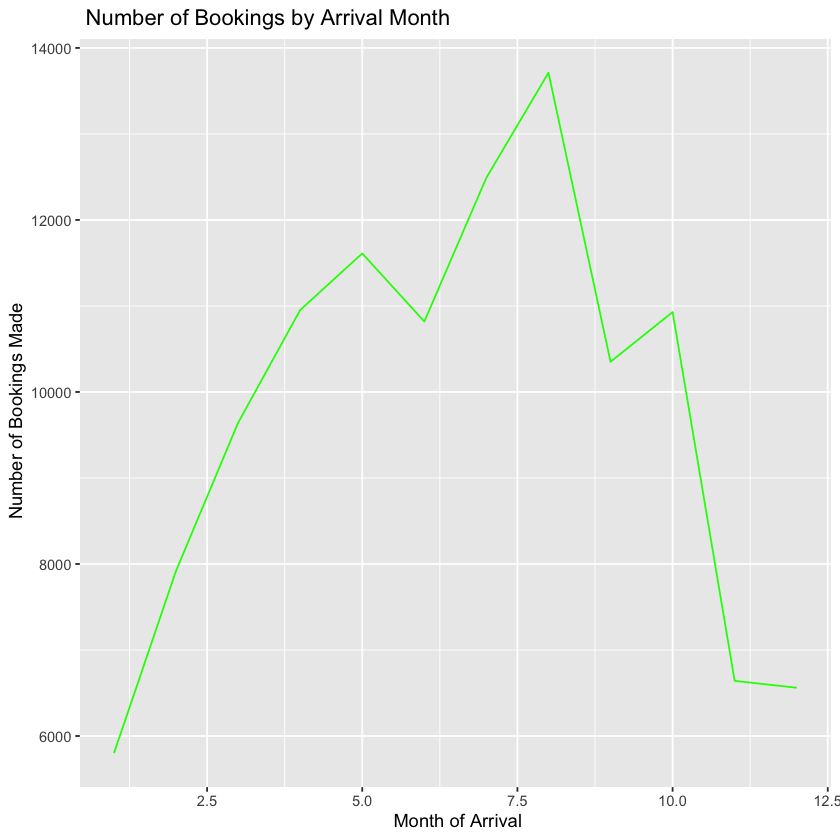

In [75]:
ggplot (peak_month_times) +
    geom_line(mapping = aes(x=arrival_date_month, y=count), color="green") +
    ggtitle( " Number of Bookings by Arrival Month") +
    xlab (" Month of Arrival") +
    ylab (" Number of Bookings Made")

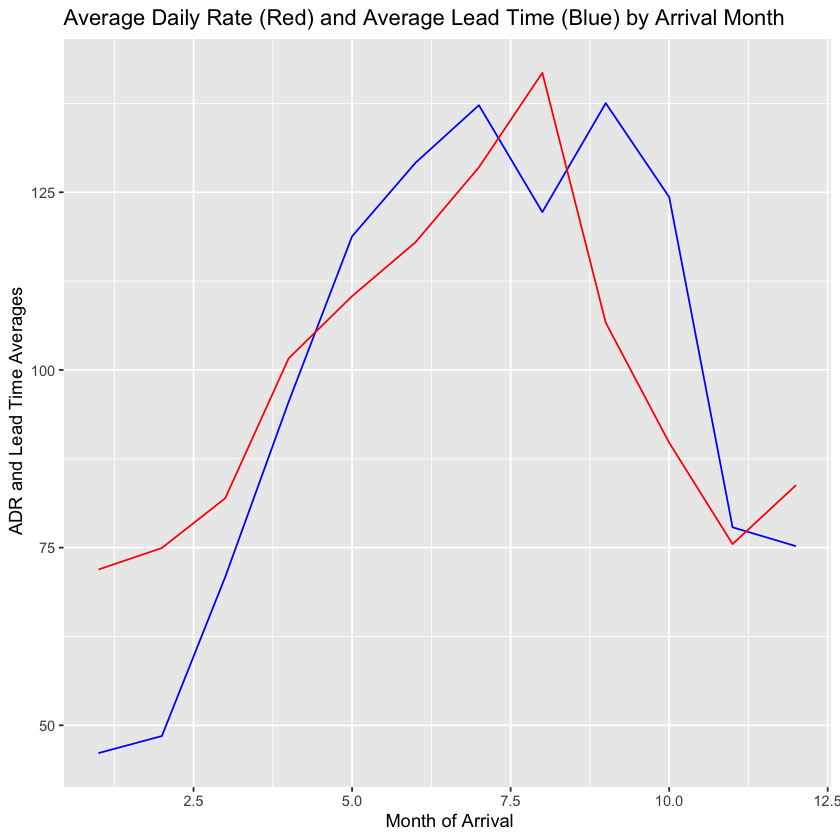

In [76]:
ggplot (peak_month_times) +    
    geom_line(mapping = aes(x=arrival_date_month, y=mean_lead_time), color="blue") +
    geom_line(mapping = aes(x=arrival_date_month, y=mean_avg_daily_rate), color="red")  +
    ggtitle( "Average Daily Rate (Red) and Average Lead Time (Blue) by Arrival Month") +
    xlab (" Month of Arrival") +
    ylab (" ADR and Lead Time Averages")

Conclusion : By looking at the newly formulated tables, we see that the most booking are made for August, July, and May. These are Summer/Spring months, so it makes sense that most people travel during this time. We can also see that the average lead time and average daily rates for these month tend to be higher than non-peak months. This suggests that people book more in advance during peak times and prices are higher - probably because there is so much demand during this time.

In [60]:
linreg <- lm(tidy$adr ~ as.factor(tidy$arrival_date_month))

summary(linreg)


Call:
lm(formula = tidy$adr ~ as.factor(tidy$arrival_date_month))

Residuals:
   Min     1Q Median     3Q    Max 
-140.2  -27.1   -3.9   19.6 5318.0 

Coefficients:
                                            Estimate Std. Error t value
(Intercept)                                  71.9138     0.5771 124.622
as.factor(tidy$arrival_date_month)February    3.0341     0.7595   3.995
as.factor(tidy$arrival_date_month)March      10.0377     0.7303  13.745
as.factor(tidy$arrival_date_month)April      29.7134     0.7137  41.633
as.factor(tidy$arrival_date_month)May        38.4668     0.7067  54.435
as.factor(tidy$arrival_date_month)June       46.0525     0.7152  64.389
as.factor(tidy$arrival_date_month)July       56.5998     0.6983  81.052
as.factor(tidy$arrival_date_month)August     69.8941     0.6884 101.533
as.factor(tidy$arrival_date_month)September  34.7292     0.7208  48.179
as.factor(tidy$arrival_date_month)October    17.8532     0.7140  25.006
as.factor(tidy$arrival_date_month)November

Based on the linear regression we can see that the most expensive months to book a hotel are June, July, and August. June is estimated to have an average daily rate of 117.96. July is estimated to have an average daily rate of 128.51. August is estimated to have an average daily rate of 141.81. The cheapest month on average is January with an estimated average daily rate of 71.91.

## Question Number 2 : 

We would like to examine the influence that different variables have on the average daily rate, in order to determine how to get the best deal at each hotel. In the last question, we determined that during peak times the average daily rate is higher, and now we would like to determine what effect the room type and lead time have on the price.

In [61]:
tidy_resort <- tidy %>% filter(hotel=="Resort Hotel")
tidy_city <- tidy %>% filter(hotel=="City Hotel")

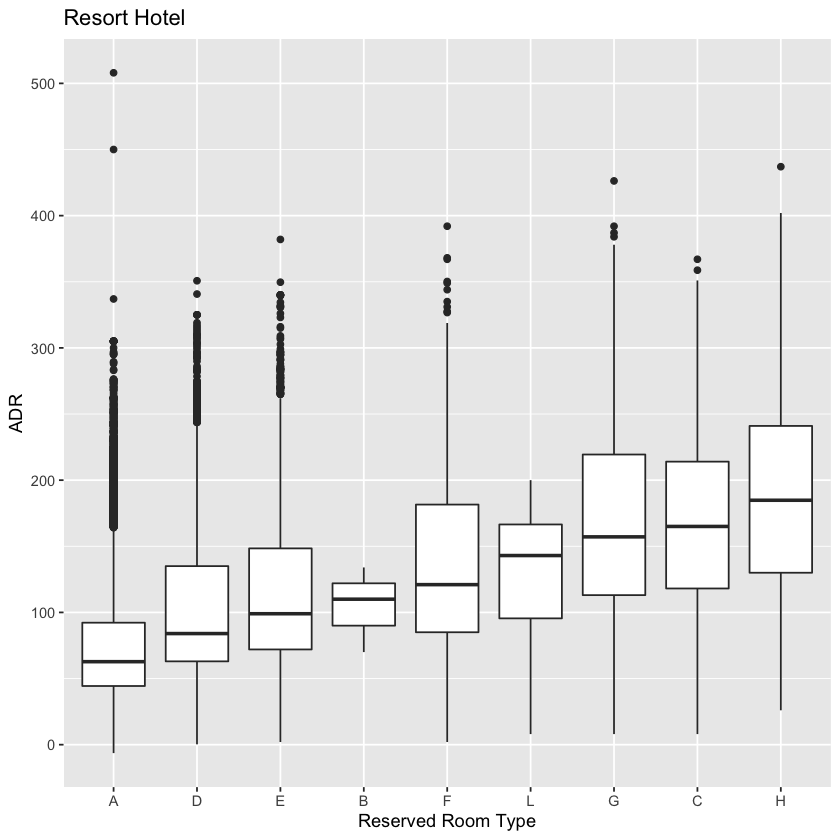

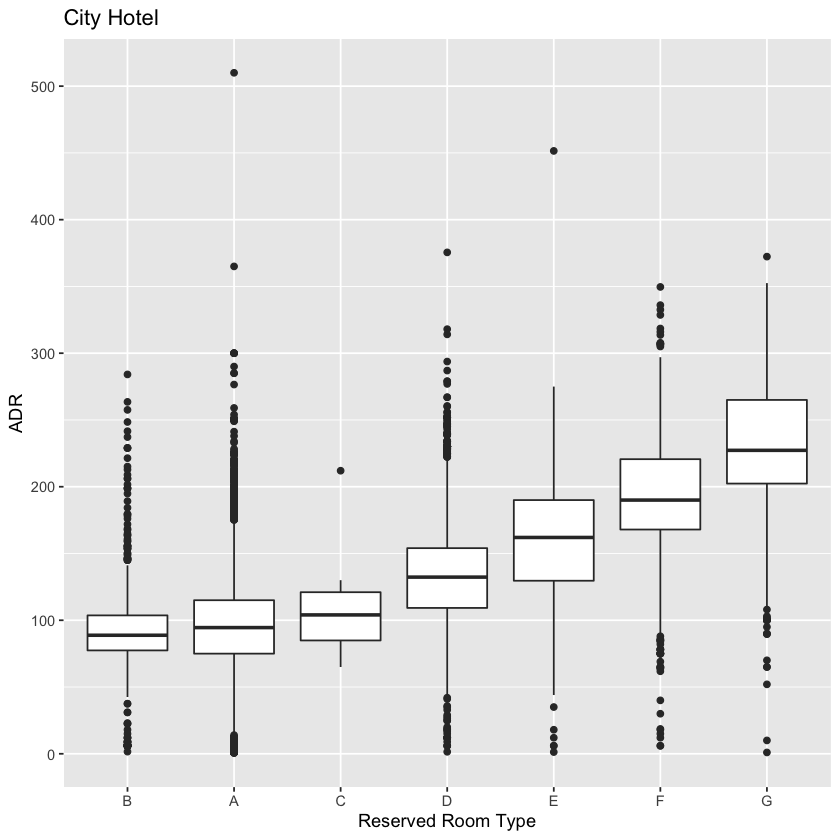

In [62]:
tidy_resort %>% group_by(reserved_room_type) %>% mutate(median=median(adr)) %>% ggplot() + geom_boxplot(mapping=aes(x=reorder(reserved_room_type,median),y=adr)) + xlab("Reserved Room Type") + ylab("ADR") + ggtitle("Resort Hotel")
tidy_city %>% filter(adr<4000) %>% group_by(reserved_room_type) %>% mutate(median=median(adr)) %>% ggplot() + geom_boxplot(mapping=aes(x=reorder(reserved_room_type,median),y=adr)) + xlab("Reserved Room Type") + ylab("ADR") +ggtitle("City Hotel")

Since the rooms are divided into different categories based on type, it is safe to assume that they may differ in price. By creating a boxplot for each individual hotel, we are able to see not only which rooms are more expensive, but also that the ranking of prices for each room type differs between the two hotels. By restricting adr values for the city hotel to less than 4000, we are able to get rid of the one extreme value that is most likely an error, and make the scale of each plot equal so the price comparisons are very easy to visualize. By organizing the plots by median average daily rates, it is easy to see which rooms are the best deal for each hotel. Although the city hotel has more expensive rooms on average, it has a better deal for some of the room types. For example, if a family was interested in renting a C type room, they would likely find a better deal for it at the city hotel.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



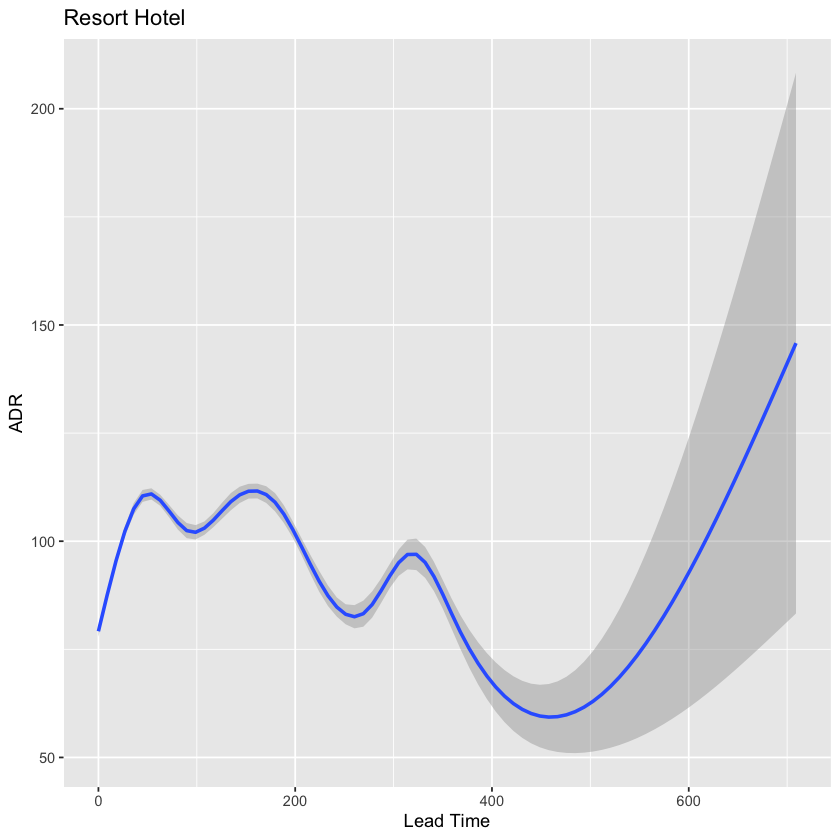

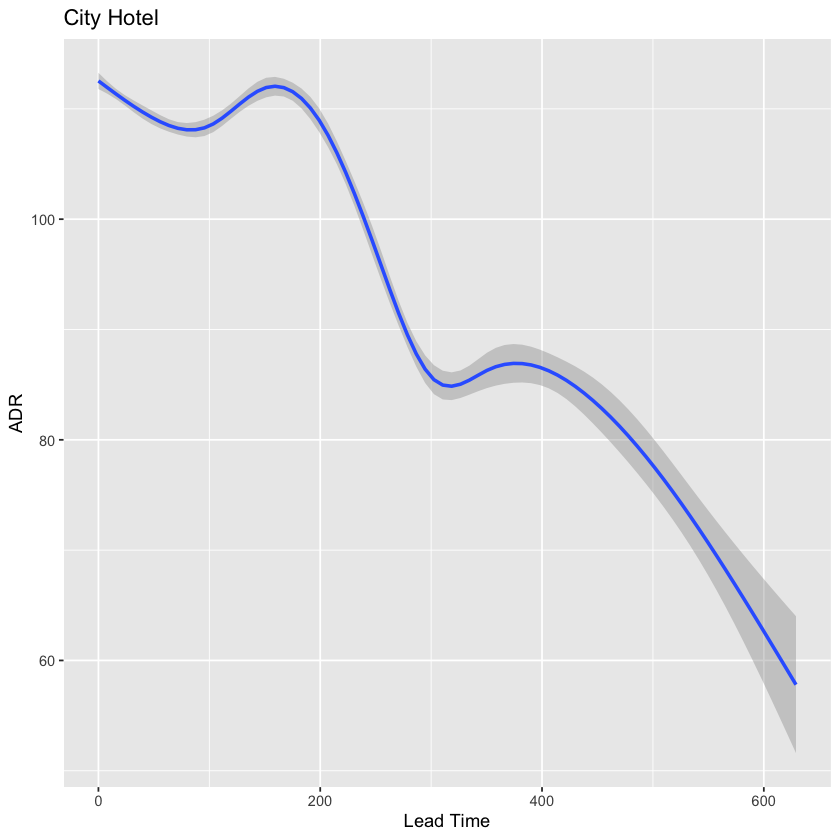

In [63]:
tidy_resort %>% ggplot() +geom_smooth(mapping=aes(x=lead_time,y=adr)) + xlab("Lead Time") + ylab("ADR") + ggtitle("Resort Hotel")

tidy_city  %>% ggplot() +geom_smooth(mapping=aes(x=lead_time,y=adr)) + xlab("Lead Time") + ylab("ADR") +ggtitle("City Hotel") 

By plotting lead time with adr for each hotel, we are able to see how effective booking ahead of time is for getting a lower rate. We can see that prices at the City Hotel are more consistent, but that typically, the farther one books in advance, the lower rate they will get. Prices for Resort hotel fluctuate over a wider range, and one is not necessarily guaranteed a lower rate for booking earlier. In fact, after 600 days, there is a sharp increase in prices, and before 50 days, the price is much lower. This may be because the hotel is trying to fill its empty rooms at the last minute. Therefore, if a customer is planning ahead for a trip, they will likely recieve a better deal staying at the City Hotel, but if it is a last minute trip, the Resort Hotel would be a safer bet.

## Question Number 3 : 

What variables can help hotels predict if someone will cancel their booking reservation?
Cancellations can cause some problems for hotels when scheduling staff etc. It may be useful to have some red flags for hotels to watch out for so cancellations don't sneak up on them and they may be able to base overbooking on these red flags.

To answer this question, is_cancel will be compared to the variables prev_cancellations, lead_time and market_segment. This will be done by finding the proportion of cancellations per value of the independent variable for prev_cancellations and lead_time. For market_segment, the proportion of cancellations per each type of market segment must be found. These results will then be displayed visually using techniques we have learned in class.

Investigate if number of previous cancellations increases the likelihood that someone will cancel their reservation by finding the proportion of cancellations based on the value of previous cancellations. Then use geom_point and geom_smooth in a faceted ggplot by the hotel variable to visualize the results.

In [64]:
prev_cancel_table <- tidy %>%
select(hotel, is_canceled, previous_cancellations) %>%
group_by(hotel, previous_cancellations, is_canceled) %>%
summarize(num_cancel = n()) %>%
spread(key = is_canceled, value = num_cancel) %>%
mutate(not_canceled = `0`, canceled = `1`) %>%
select(hotel, previous_cancellations, not_canceled, canceled) %>%
mutate(not_canceled = ifelse(is.na(not_canceled) == TRUE, 0, not_canceled)) %>%
mutate(canceled = ifelse(is.na(canceled) == TRUE, 0, canceled)) %>%
mutate(prop_canceled = canceled / (not_canceled + canceled)) %>%
mutate(prop_not_canceled = not_canceled / (not_canceled + canceled))
prev_cancel_table

`summarise()` regrouping output by 'hotel', 'previous_cancellations' (override with `.groups` argument)



hotel,previous_cancellations,not_canceled,canceled,prop_canceled,prop_not_canceled
<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
City Hotel,0,44832,27987,0.38433651,0.61566349
City Hotel,1,177,4938,0.96539589,0.03460411
City Hotel,2,42,11,0.20754717,0.79245283
City Hotel,3,38,6,0.13636364,0.86363636
City Hotel,4,9,1,0.10000000,0.90000000
City Hotel,5,10,1,0.09090909,0.90909091
City Hotel,6,15,7,0.31818182,0.68181818
City Hotel,11,25,10,0.28571429,0.71428571
City Hotel,13,1,11,0.91666667,0.08333333


First I select my necessary variables which are; hotel, is_canceled, previous_cancellations. I then group by all of those variables in order to creat a new variable "num_cancel" to count the number of canceled bookings and not canceled bookings for each hotel and for each value of previous cancellations. I then spread by is canceled in order to have a column of the canceled booking values and the not canceled booking values. Then in order to make the table more readable I renamed the is_canceled values. Because the value in spread would return NA instead of 0 if there were no canceled or not canceled bookings for a given previous_cancellation value, I changed these NAs to 0. I then found the proportion of canceled and not canceled bookings.

Below I have graphed the results using geom_point(), geom_smooth(), and facet_wrap() in order to compare the two types of hotels. I graphed both the proportion of canceled bookings and the propotion of bookings not canceled. Even though the graphs are inverses of each other I though it may be useful to see both.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



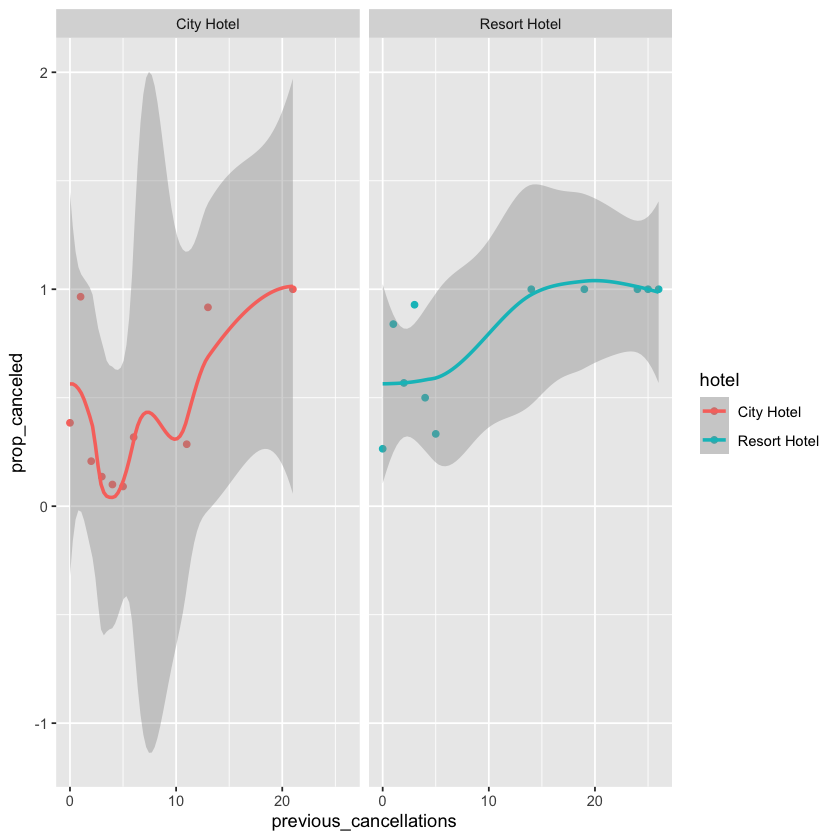

In [65]:
ggplot(data = prev_cancel_table, mapping = aes(x = previous_cancellations, y = prop_canceled, color = hotel)) +
geom_point() +
geom_smooth() +
facet_wrap(~ hotel)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



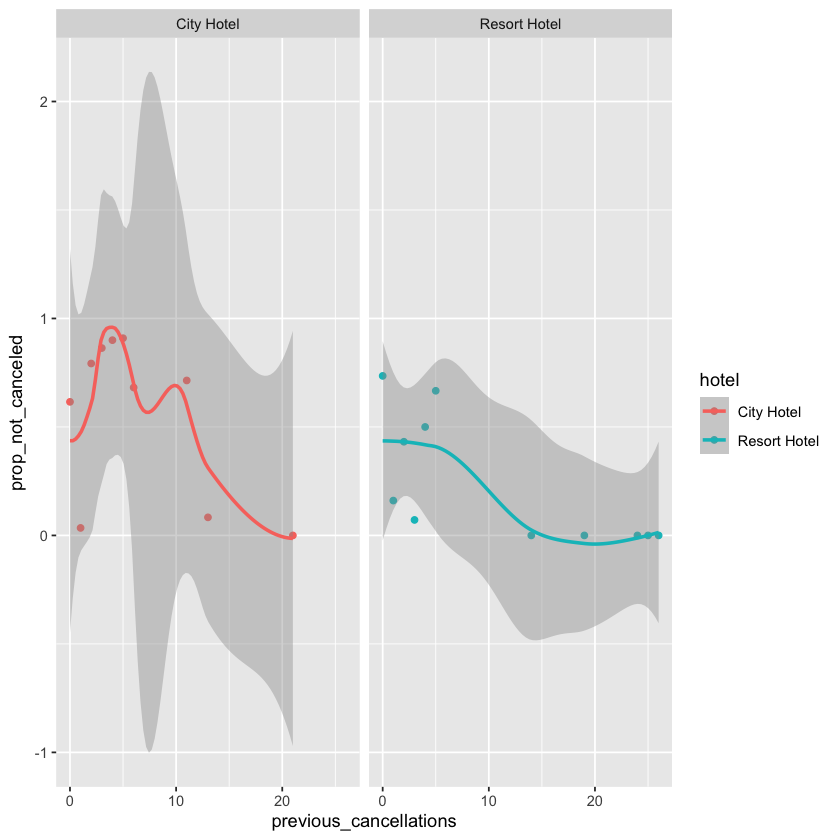

In [66]:
ggplot(data = prev_cancel_table, mapping = aes(x = previous_cancellations, y = prop_not_canceled, color = hotel)) +
geom_point() +
geom_smooth() +
facet_wrap(~ hotel)

Based on these graphs we can infer that given the data, the chances that someone will cancel their reservation goes up as the number of previous cancellations goes up and the chances someone will NOT cancel their reservation goes down as the number of previous cancellations goes up. This appears to be generally true for both hotels however, the data is more consistent for the Resort Hotel.

Similarly, check now if previous_bookings_not_canceled DECREASES the likelihood that someone will cancel their reservation by seeing how many current cancellations there are for each number of previous bookings not canceled. Print a table with 2 columns: previous_bookings_not_canceled and is_canceled_count, sort in descending order of previous bookings.

Is there an association between how far in advance someone books their reservation and the likelihood they will end up canceling? Use geom_smooth and facet by hotel again, after finding the proportion of cancellations for every lead_time.

In [67]:
lead_book_table2 <- tidy %>%
select(hotel, is_canceled, lead_time) %>%
group_by(hotel, lead_time, is_canceled) %>%
summarize(num_cancel = n()) %>%
spread(key = is_canceled, value = num_cancel) %>%
mutate(not_canceled = `0`, canceled = `1`) %>%
select(hotel, lead_time, not_canceled, canceled) %>%
mutate(not_canceled = ifelse(is.na(not_canceled) == TRUE, 0, not_canceled)) %>%
mutate(canceled = ifelse(is.na(canceled) == TRUE, 0, canceled)) %>%
mutate(prop_canceled = canceled / (not_canceled + canceled)) %>%
mutate(prop_not_canceled = not_canceled / (not_canceled + canceled))
head(lead_book_table2)
tail(lead_book_table2)

`summarise()` regrouping output by 'hotel', 'lead_time' (override with `.groups` argument)



hotel,lead_time,not_canceled,canceled,prop_canceled,prop_not_canceled
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
City Hotel,0,2443,240,0.08945211,0.9105479
City Hotel,1,1539,216,0.12307692,0.8769231
City Hotel,2,955,122,0.11327762,0.8867224
City Hotel,3,859,114,0.11716341,0.8828366
City Hotel,4,884,122,0.12127237,0.8787276
City Hotel,5,773,154,0.16612729,0.8338727


hotel,lead_time,not_canceled,canceled,prop_canceled,prop_not_canceled
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Resort Hotel,462,0,20,1.0000000,0.0000000
Resort Hotel,468,17,28,0.6222222,0.3777778
Resort Hotel,471,0,6,1.0000000,0.0000000
Resort Hotel,532,1,0,0.0000000,1.0000000
Resort Hotel,542,22,0,0.0000000,1.0000000
Resort Hotel,709,1,0,0.0000000,1.0000000


This process was very similar to that of the first comparison to previous_cancellations. First I select my necessary variables which are; hotel, is_canceled, and lead_time. I then group by all of those variables in order to creat a new variable "num_cancel" to count the number of canceled bookings and not canceled bookings for each hotel and for each value of lead time. I then spread by is_canceled in order to have a column of the canceled booking values and the not canceled booking values. Then in order to make the table more readable I renamed the is_canceled values. Because the value in spread would return NA instead of 0 if there were no canceled or not canceled bookings for a given previous_cancellation value, I changed these NAs to 0. I then found the proportion of canceled and not canceled bookings.

Below I have graphed the results using only geom_smooth() because it looked too messy with geom_point() too. I again use facet_wrap() in order to compare the two types of hotels. I again graphed both the proportion of canceled bookings and the propotion of bookings not canceled. Even though the graphs are inverses of each other I though it may be useful to see both.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



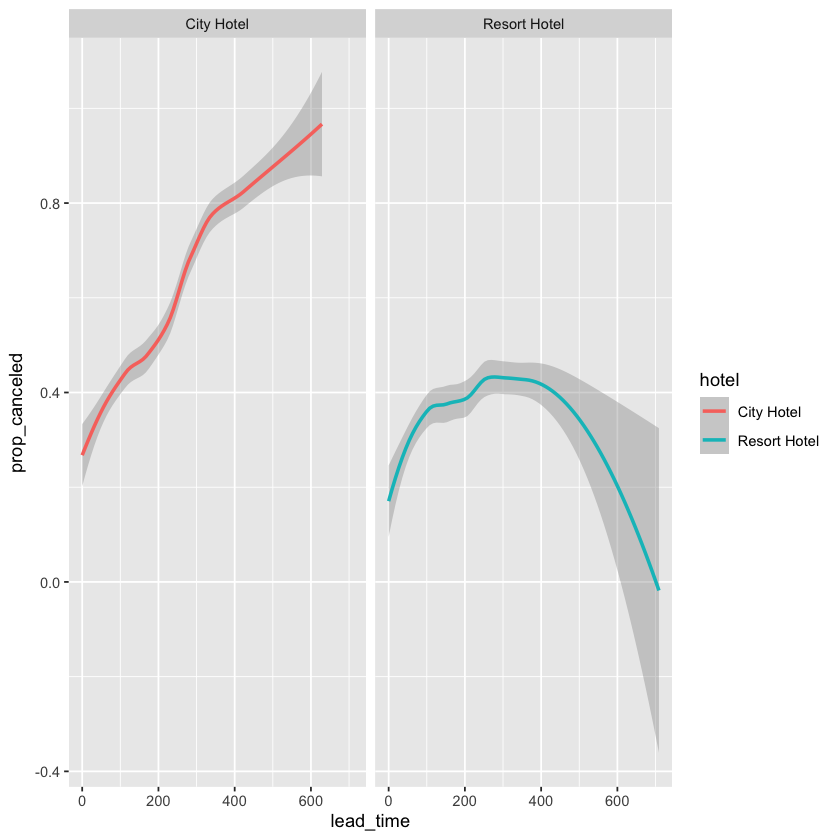

In [68]:
ggplot(data = lead_book_table2, mapping = aes(x = lead_time, y = prop_canceled, color = hotel)) +
geom_smooth() +
facet_wrap(~ hotel)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



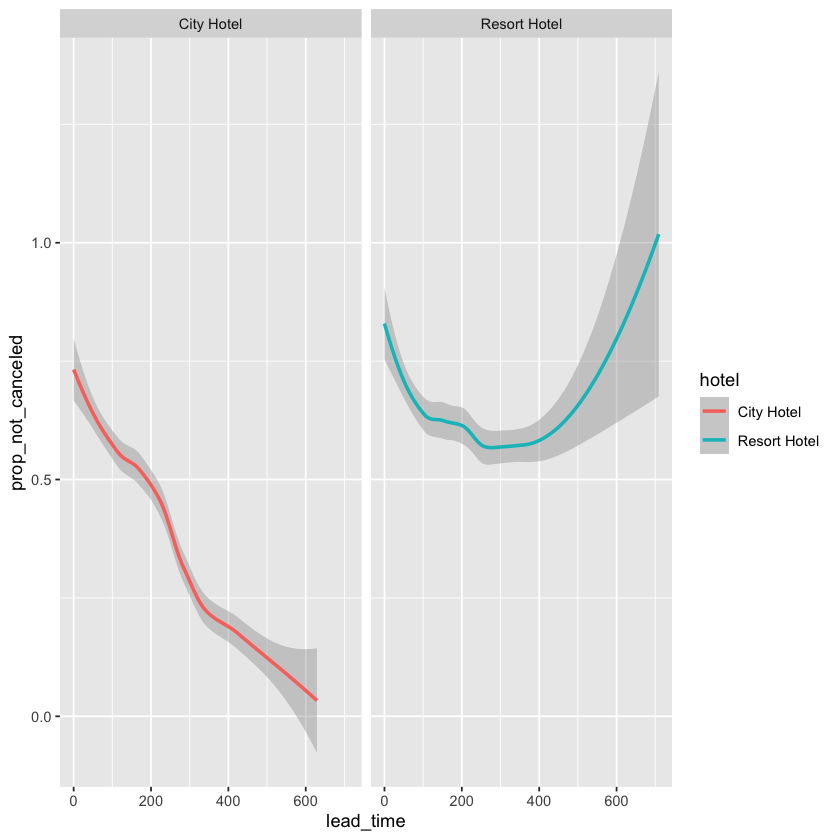

In [69]:
ggplot(data = lead_book_table2, mapping = aes(x = lead_time, y = prop_not_canceled, color = hotel)) +
geom_smooth() +
facet_wrap(~ hotel)

Based on these graphs we can infer that given the data, for the City Hotel the proportion of cancellations increase the farther in advance the booking is made and the proportion of bookings not canceled decreases the farther in advance the booking is made. The Resort Hotel on the other hand is a bit more complicated. The proportion of cancellations for the Resort Hotel increase from about 0 days in advance to 300 days in advance and then decrease from 300 days in advance to 700 days in advance.

Because of this inconsistency I decided to investigate the average lead time grouped by each hotel and whether or not it was canceled. The values in this table shows me that while the Resort Hotel graph is less linear the averages are still relatively similar to the City Hotel. For both hotels the average lead time for bookings that end up being canceled is larger than the average lead time of bookings that are not canceled.

In [70]:
avg_table <- tidy %>%
select(hotel, is_canceled, lead_time) %>%
group_by(is_canceled, hotel) %>%
summarize(avg_lead_time = mean(lead_time))
avg_table

`summarise()` regrouping output by 'is_canceled' (override with `.groups` argument)



is_canceled,hotel,avg_lead_time
<dbl>,<chr>,<dbl>
0,City Hotel,81.92948
0,Resort Hotel,79.61257
1,City Hotel,150.68313
1,Resort Hotel,128.82886


See if each type of market segment designation is more associated with cancellation or less associated with cancellation than the others. Find the proportion of cancellations for each method of market segment, then use geom_bar and facet_wrap by hotel to visualize the results.

In [71]:
markseg_table <- tidy %>%
select(hotel, is_canceled, market_segment) %>%
group_by(hotel, is_canceled, market_segment) %>%
summarize(num_cancel = n()) %>%
spread(key = is_canceled, value = num_cancel) %>%
mutate(not_canceled = `0`, canceled = `1`) %>%
select(hotel, market_segment, not_canceled, canceled) %>%
mutate(not_canceled = ifelse(is.na(not_canceled) == TRUE, 0, not_canceled)) %>%
mutate(canceled = ifelse(is.na(canceled) == TRUE, 0, canceled)) %>%
mutate(prop_canceled = canceled / (not_canceled + canceled)) %>%
mutate(prop_not_canceled = not_canceled / (not_canceled + canceled)) %>%
print()

`summarise()` regrouping output by 'hotel', 'is_canceled' (override with `.groups` argument)



# A tibble: 14 x 6
# Groups:   hotel [2]
   hotel     market_segment not_canceled canceled prop_canceled prop_not_cancel…
   <chr>     <chr>                 <dbl>    <int>         <dbl>            <dbl>
 1 City Hot… Aviation                180       51        0.221             0.779
 2 City Hot… Complementary            31        3        0.0882            0.912
 3 City Hot… Corporate              2318      638        0.216             0.784
 4 City Hot… Direct                 4935     1047        0.175             0.825
 5 City Hot… Groups                 4222     9609        0.695             0.305
 6 City Hot… Offline TA/TO          9365     7146        0.433             0.567
 7 City Hot… Online TA             24098    14477        0.375             0.625
 8 City Hot… Undefined                 0        2        1                 0    
 9 Resort H… Complementary            27        2        0.0690            0.931
10 Resort H… Corporate              1908      349        0.155      

This code is also pretty similar to the other two subparts. First I select my necessary variables which are; hotel, is_canceled, and market_segment. I then group by all of those variables in order to creat a new variable "num_cancel" to count the number of canceled bookings and not canceled bookings for each hotel and for each type of market segment. I then spread by is canceled in order to have a column of the canceled booking values and the not canceled booking values. Then in order to make the table more readable I renamed the is_canceled values. Because the value in spread would return NA instead of 0 if there were no canceled or not canceled bookings for a given previous_cancellation value, I changed these NAs to 0. I then found the proportion of canceled and not canceled bookings.

Below I have graphed the results using geom_col() where each bar represents a type of market segment, and facet_wrap() in order to compare the two types of hotels. I then flipped the coordinates so that the market segments were easier to read.

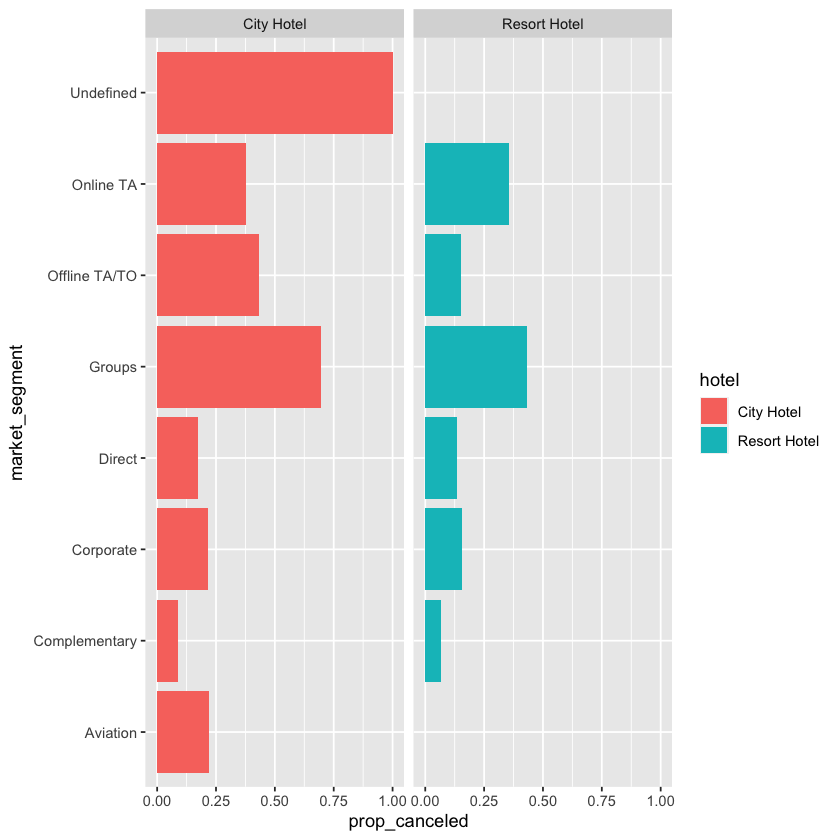

In [72]:
ggplot(data = markseg_table) +
geom_col(mapping = aes(x = market_segment, y = prop_canceled, fill = hotel)) +
facet_wrap(~ hotel) +
coord_flip()

If we disregard market segment "Undefined" which is associated with the highest proportion of canceled bookings at the City Hotel but doesn't provide much information, the highest proportion for both hotels is in the "Groups" market segment. So people that make their bookings under market segment "Groups" are the most likely to cancel their hotel booking.

Conclusion: There are a few things that hotels can look for when assessing likelihood a customer will cancel a booking. For both the City Hotel and the Resort Hotel, the higher number of previous cancellations a customer has, the more likely they will cancel their bookings. Also, on average the farther in advance a booking is made, the more likely the customer is to cancel it. This relationship is relatively consistent for the City Hotel. However for the proportion of Resort Hotel cancellations increase from about 0 days in advance to 300 days in advance and then decrease from 300 days in advance to 700 days in advance. The third variable that the hotels can look at is "market_segment". For the City Hotel and the Resort Hotel the market segment with the highest proportion of cancellations is "Groups". The second highest for the City Hotel is "Online TA/TO" (TA meaning Travel Agents and TO meaning Tour Operations) with a close third being "Online TA". The second highest for the Resort Hotel is the "Online TA" market segment.

## Question 4  
//fill in

## Conclusion

We found that peak times for hotel bookings are in the Spring / Summer months, with average lead times and daily rates going up during those times. From the customers perspective, it's important to account for the differences in prices between the two hotels and how they are related to how far in advance the booking is made and the room type. From the hotel's perspective, it would be useful to determine which customers are likely to cancel a booking. Based on our findings generally speaking for both hotels, a higher number of previous cancellations, a larger number time between the booking and the arrival, and booking through the “Groups” market segment were all associated with a higher likelihood of cancelling. We found out that it is in the hotels best interest to advertize in a more direct manner in order to obtain more direct bookings as this would lead to less cancellations and increase in overall revenue. Hotels and customers can use this information to make decisions to minimize expenses and maximize utility.